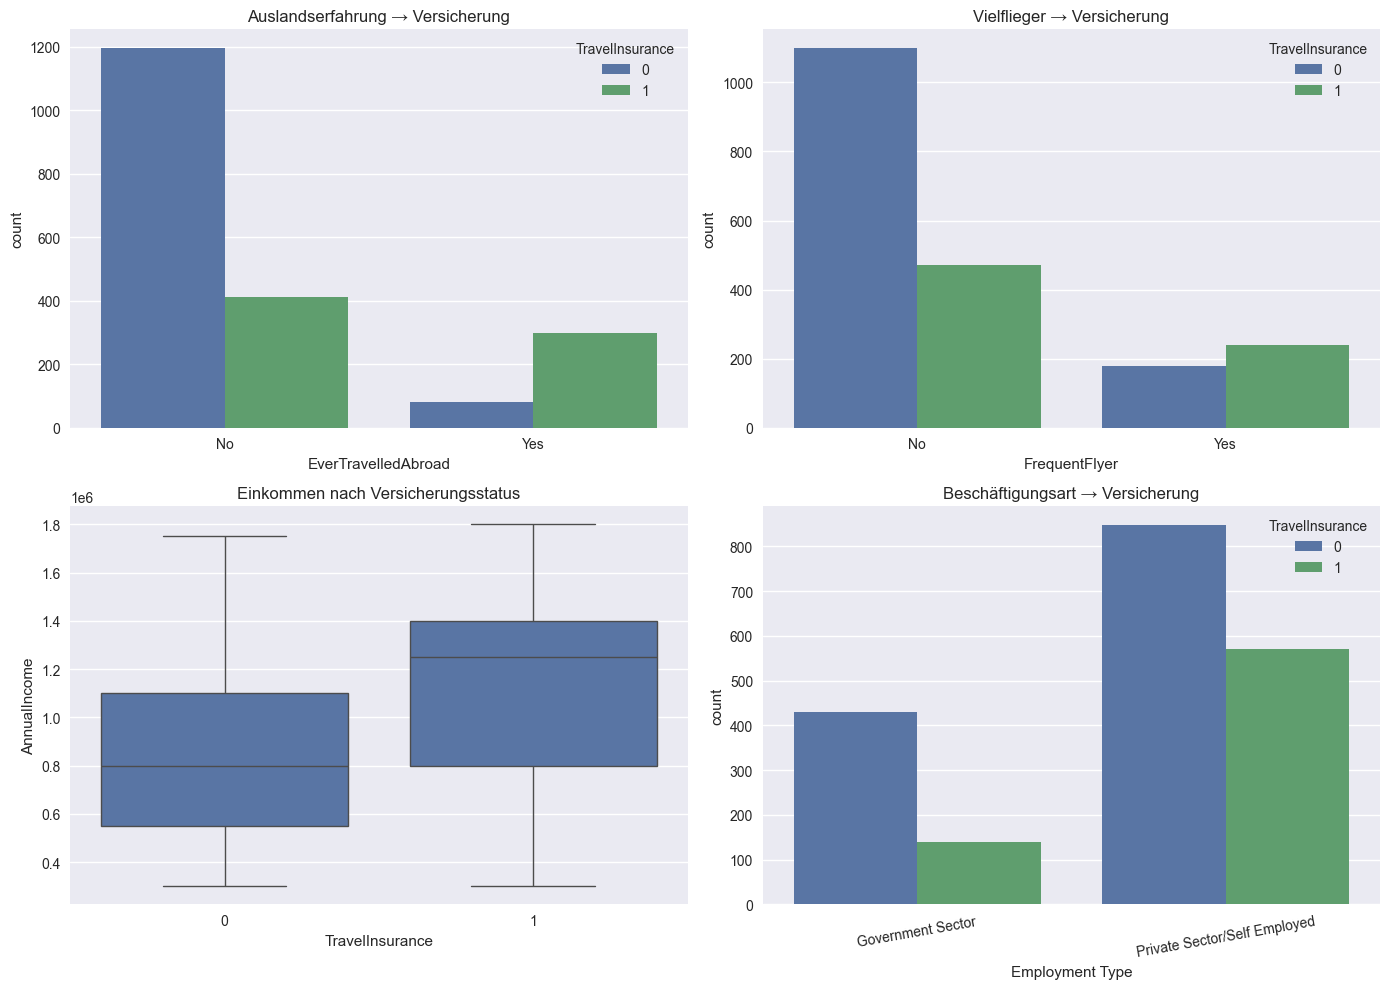

In [1]:
# ==================================================================
# AUFGABE 3 – Pandas und Data Understanding (Travel Insurance)
# ==================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.contingency import association
plt.style.use('seaborn-v0_8')
pd.set_option('display.float_format', '{:,.2f}'.format)

# Daten laden & bereinigen
df = pd.read_csv('TravelInsurancePrediction.csv')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# ==============================================================
# 1 Portfoliobestandteil
# ==============================================================

df.head()  # 1a

df.shape   # 1b → 1987 Zeilen, 9 Spalten

df.columns.tolist()  # 1c – alle Namen sehr klar und intuitiv!

df.describe(include='all')  # 1d + 1g
# → Keine Ausreißer! AnnualIncome 300k–1.8M plausibel, Age nur 25–35 (junge Stichprobe), FamilyMembers max 9 → alles sauber

# Erkenntnisse 1: Datensatz extrem sauber, keine Missings, keine Ausreißer, perfekte Variablennamen

# ==============================================================
# 2 Portfoliobestandteil
# ==============================================================

# 2a – Fragestellungen mit Gruppierung
"""
- Wer mit Auslandserfahrung kauft öfter Versicherung?
- Vielflieger?
- Höheres Einkommen = höhere Kaufwahrscheinlichkeit?
- Private vs. Government Sector?
- Chronische Krankheiten relevant?
→ Alle super mit crosstab / groupby lösbar!
"""

# 2b – Hypothesen + direkte Überprüfung
pd.crosstab(df['EverTravelledAbroad'], df['TravelInsurance'], normalize='index')*100
# → 44.2% vs 25.1% → Hypothese stark bestätigt!

pd.crosstab(df['FrequentFlyer'], df['TravelInsurance'], normalize='index')*100
# → 57.3% vs 30.0% → Vielflieger kaufen MASSIV öfter!

df['IncomeGroup'] = pd.cut(df['AnnualIncome'], bins=5)
pd.crosstab(df['IncomeGroup'], df['TravelInsurance'], normalize='index')*100
# → Klarer Trend: höchstes Quintil = 68.6% versichert!

pd.crosstab(df['Employment Type'], df['TravelInsurance'], normalize='index')*100
# → Private/Self Employed 47.0% vs Government nur 17.2% → Riesen-Unterschied!

pd.crosstab(df['ChronicDiseases'], df['TravelInsurance'], normalize='index')*100
# → Kein Unterschied → Hypothese widerlegt

# 2c – Erkenntnisse
"""
Stärkste Prädiktoren: EverTravelledAbroad, FrequentFlyer, AnnualIncome, Employment Type
Kein Einfluss: ChronicDiseases, Age, GraduateOrNot
Gruppierungsoperationen sind der Hammer für schnelle Hypothesentests!
"""

# ==============================================================
# 3 Portfoliobestandteil
# ==============================================================

df.describe(include='all')  # 3a + 3c

# 3b – Erwartung vs Realität
"""
Erwartet & bestätigt: Einkommen, Auslandserfahrung, Vielflieger
Überraschend: Chronische Krankheiten irrelevant, Government Sector kauft fast nie (nur 17%!)
"""

# 3d – Mittelwert vs Median & Streuung
"""
Age           : Mean 29.65 | Median 29 → symmetrisch, sehr geringe Streuung (Std=2.91)
AnnualIncome  : Mean 933k  | Median 900k → leicht rechtsschief
FamilyMembers : Mean 4.75  | Median 5 → leicht linksschief
TravelInsurance: 35.7% positiv → leicht unausgewogen, aber ok
"""

# 3e – Gesamterkenntnisse
"""
Der Datensatz zeigt klare sozioökonomische Muster: Wer reist, viel verdient und im Privatsektor arbeitet,
kauft fast immer eine Reiseversicherung. Gesundheit und Alter spielen fast keine Rolle.
Perfekter Datensatz für binäre Klassifikation!
"""

# Bonus-Plot
fig, ax = plt.subplots(2,2, figsize=(14,10))
sns.countplot(data=df, x='EverTravelledAbroad', hue='TravelInsurance', ax=ax[0,0])
ax[0,0].set_title('Auslandserfahrung → Versicherung')
sns.countplot(data=df, x='FrequentFlyer', hue='TravelInsurance', ax=ax[0,1])
ax[0,1].set_title('Vielflieger → Versicherung')
sns.boxplot(data=df, x='TravelInsurance', y='AnnualIncome', ax=ax[1,0])
ax[1,0].set_title('Einkommen nach Versicherungsstatus')
sns.countplot(data=df, x='Employment Type', hue='TravelInsurance', ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=10)
ax[1,1].set_title('Beschäftigungsart → Versicherung')
plt.tight_layout()
plt.show()